In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
cf = pd.read_csv('data/final/final_data_classified.txt', sep='\t', encoding='utf-8', header=0)
cf.shape

(4798, 6)

In [4]:
data = {}
for event_name in cf['event'].unique():
    event_filename = re.sub("\W+", "", event_name.strip())
    data[event_name] = pd.read_csv('data/final/event_%s_data.txt' % event_filename, sep='\t', encoding='utf-8', header=0, parse_dates=['created_at'], dtype={'twitter_id' : 'str'})
    
allevents = list(data.values())

df = pd.concat(allevents)
df.drop_duplicates(subset='twitter_id', inplace=True)
df.shape

(1053377, 37)

In [5]:
summary = pd.DataFrame(columns=['event', 'tweets', 'users', 'engagements'])

for eventdf in allevents:
    event = eventdf['event'][0]
    tweets = eventdf['twitter_id'].nunique()
    users = eventdf['user_id_str'].nunique()
    eventdf['engagements'] = eventdf['favorite_count'] + eventdf['retweet_count']
    engagements = eventdf['engagements'].sum()
    
    row = pd.Series([event, tweets, users, engagements], index=['event', 'tweets', 'users', 'engagements'])
    summary = summary.append(row.T, ignore_index=True)

In [6]:
event_domain = {
    'UEFA Champions League Final' : 'Sporting Event',
    'French Open Finals' : 'Sporting Event',
    'Monaco Grand Prix' : 'Sporting Event',
    'Stanley Cup Playoffs Final Game 7' : 'Sporting Event',
    '24 Hours of Le Mans' : 'Sporting Event',
    'NBA Playoffs Finals Game 7': 'Sporting Event',
    'The Next Web Conference Europe' : 'Technology Conference',
    'Recode Code Conference' : 'Technology Conference',
    'Google I/O' : 'Technology Conference',
    'Apple Worldwide Developer Conference' : 'Technology Conference',
    'Lenovo Tech World' : 'Technology Conference',
    'Xbox E3' : 'Technology Conference',
    }

summary['event_domain'] = summary['event']
summary['event_domain'].replace(event_domain, inplace=True)

In [7]:
summary['tweets_per_user'] = summary['tweets'] / summary['users']
summary['engagements_per_tweet'] = summary['engagements'] / summary['tweets']
summary['engagements_per_user'] = summary['engagements'] / summary['users']

In [8]:
summary

,event,tweets,users,engagements,event_domain,tweets_per_user,engagements_per_tweet,engagements_per_user
0,Google I/O,25533.0,8967.0,118518.0,Technology Conference,2.847441,4.641758,13.217129
1,Stanley Cup Playoffs Final Game 7,52528.0,32916.0,618064.0,Sporting Event,1.595820,11.766372,18.777008
2,UEFA Champions League Final,192602.0,91530.0,1157004.0,Sporting Event,2.104250,6.007227,12.640708
3,French Open Finals,23552.0,9436.0,206522.0,Sporting Event,2.495973,8.768767,21.886604
4,NBA Playoffs Finals Game 7,514349.0,337962.0,2913478.0,Sporting Event,1.521914,5.664399,8.620727
5,Apple Worldwide Developer Conference,40027.0,19696.0,116413.0,Technology Conference,2.032240,2.908362,5.910489
6,Recode Code Conference,5780.0,2205.0,51438.0,Technology Conference,2.621315,8.899308,23.327891
7,Monaco Grand Prix,62212.0,21982.0,737306.0,Sporting Event,2.830134,11.851508,33.541352
8,24 Hours of Le Mans,31672.0,9840.0,246008.0,Sporting Event,3.218699,7.767365,25.000813
9,Xbox E3,86475.0,22791.0,339161.0,Technology Conference,3.794261,3.922070,14.881357


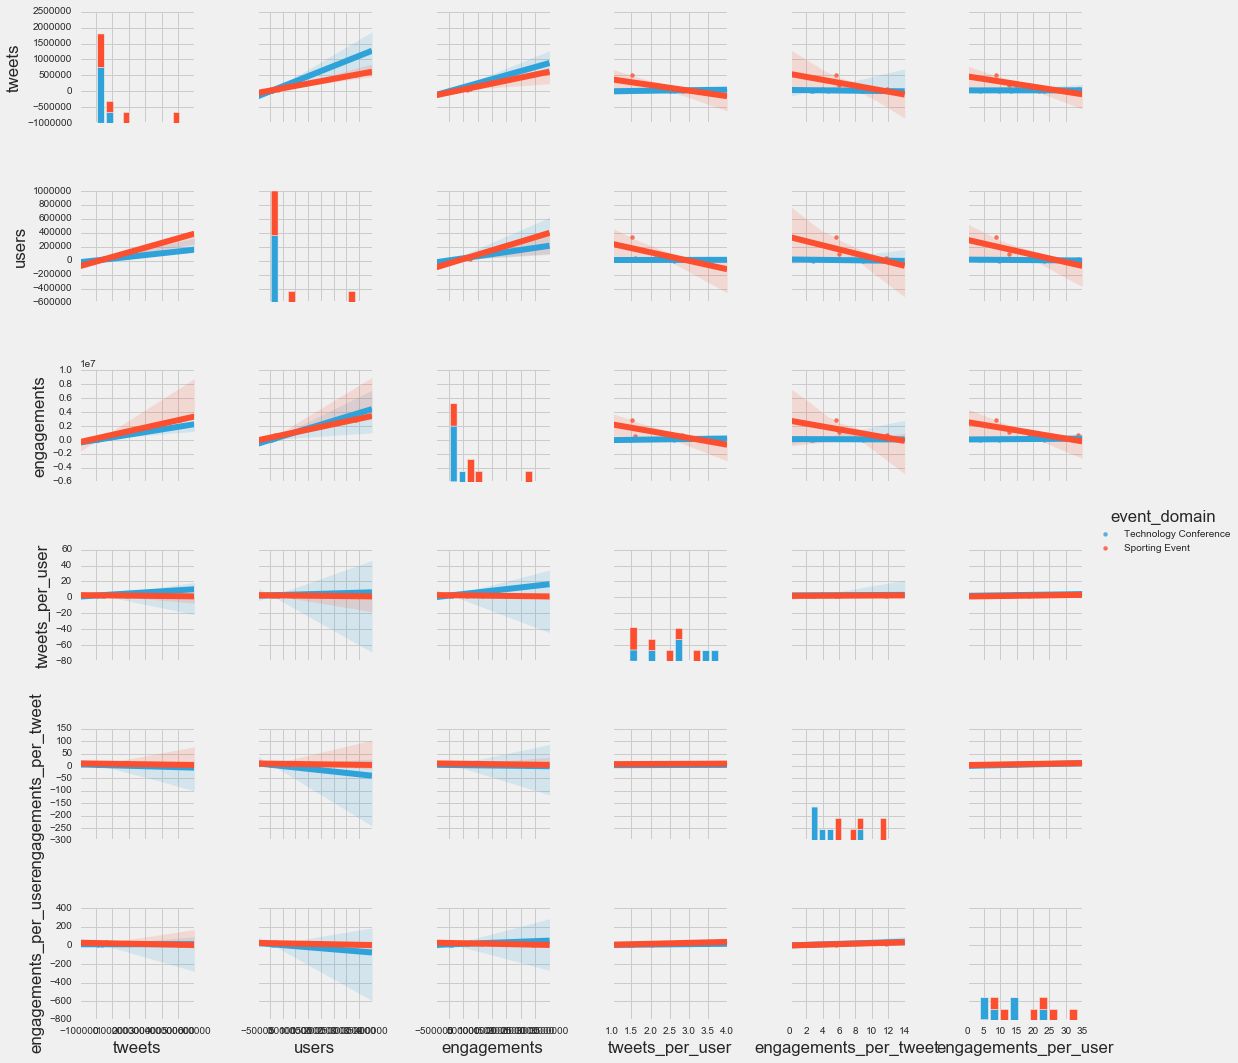

In [34]:
title = 'Correlations of Audience Metrics by Event Domain'

sns.pairplot(data=summary, kind='reg', hue='event_domain')

fig = plt.gcf()
plt.show()
fig.savefig('images/summaryeval_%s.png' % title.replace(' ', '_'))

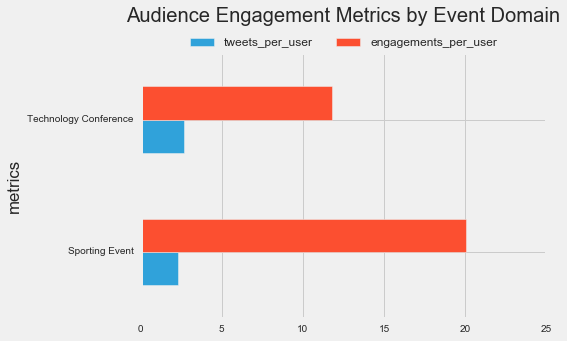

In [22]:
title = 'Audience Engagement Metrics by Event Domain'

fig, ax = plt.subplots(figsize=(8,5))

summary.groupby('event_domain')[['tweets_per_user', 'engagements_per_user']].mean().plot(kind='barh', ax=ax)

plt.ylabel('metrics')
plt.title(title, y=1.1)
plt.legend(markerscale=2, fontsize=12, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)
fig = plt.gcf()
plt.tight_layout()
plt.show()
fig.savefig('images/summaryeval_%s.png' % title.replace(' ', '_'))